In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import graphviz

In [5]:
customer = pd.read_csv('data.csv')

In [6]:
# LabelEncoder
le = LabelEncoder()

customer["Car Type"] = le.fit_transform(customer["Car Type"])
customer["Gender"] = le.fit_transform(customer["Gender"])
customer["Shirt Size"] = le.fit_transform(customer["Shirt Size"])
customer["Class"] = le.fit_transform(customer["Class"])

In [7]:
customer.head()

,Customer ID,Gender,Car Type,Shirt Size,Class
0,1,1,0,3,0
1,2,1,2,2,0
2,3,1,2,2,0
3,4,1,2,1,0
4,5,1,2,0,0


In [8]:
features_cols = ['Gender', 'Car Type', 'Shirt Size']
X = customer[features_cols]
y = customer['Class']

In [16]:
customer

,Customer ID,Gender,Car Type,Shirt Size,Class
0,1,1,0,3,0
1,2,1,2,2,0
2,3,1,2,2,0
3,4,1,2,1,0
4,5,1,2,0,0
5,6,1,2,0,0
6,7,0,2,3,0
7,8,0,2,3,0
8,9,0,2,2,0
9,10,0,1,1,0


In [14]:
# Train a decision tree model 
model = DecisionTreeClassifier()
model.fit(X, y)

# # Predict the test set results
# y_pred = model.predict(X_test)

# # Evaluate the model
# print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))

# # Confusion matrix
# print(confusion_matrix(y_test, y_pred))

DecisionTreeClassifier()

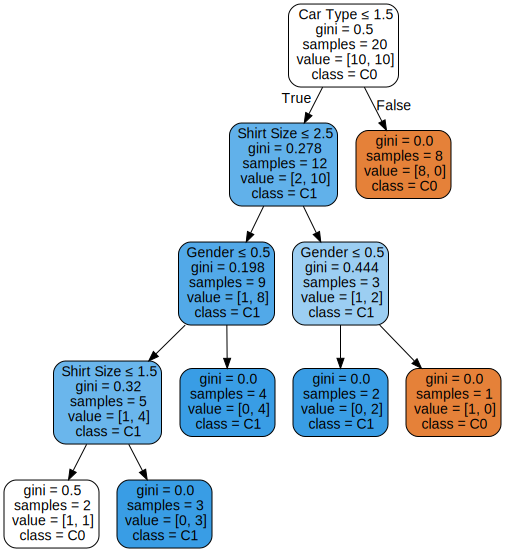

In [15]:
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=features_cols,  
                                class_names=['C0', 'C1'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [11]:
export_text(model, feature_names=features_cols)

'|--- Car Type <= 1.50\n|   |--- Shirt Size <= 1.50\n|   |   |--- Car Type <= 0.50\n|   |   |   |--- class: 1\n|   |   |--- Car Type >  0.50\n|   |   |   |--- class: 0\n|   |--- Shirt Size >  1.50\n|   |   |--- Gender <= 0.50\n|   |   |   |--- class: 1\n|   |   |--- Gender >  0.50\n|   |   |   |--- Shirt Size <= 2.50\n|   |   |   |   |--- class: 1\n|   |   |   |--- Shirt Size >  2.50\n|   |   |   |   |--- class: 0\n|--- Car Type >  1.50\n|   |--- class: 0\n'

In [12]:
raw_customer = pd.read_csv('data.csv')

SportCar = raw_customer[raw_customer['Car Type'] == 'Family']

# Remove column
SportCar = SportCar.drop(['Customer ID'], axis=1)

SportCar

,Gender,Car Type,Shirt Size,Class
0,M,Family,Small,C0
10,M,Family,Large,C1
11,M,Family,Extra Large,C1
12,M,Family,Medium,C1
